Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install wordcloud bnlp_toolkit

     |████████████████████████████████| 23.9 MB 102 kB/s 
     |████████████████████████████████| 1.2 MB 53.8 MB/s 
     |████████████████████████████████| 743 kB 84.5 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [3]:
from bnlp.corpus import stopwords, punctuations

punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [4]:
stopwords

['অতএব',
 'অথচ',
 'অথবা',
 'অনুযায়ী',
 'অনেক',
 'অনেকে',
 'অনেকেই',
 'অন্তত',
 'অন্য',
 'অবধি',
 'অবশ্য',
 'অর্থাত',
 'আই',
 'আগামী',
 'আগে',
 'আগেই',
 'আছে',
 'আজ',
 'আদ্যভাগে',
 'আপনার',
 'আপনি',
 'আবার',
 'আমরা',
 'আমাকে',
 'আমাদের',
 'আমার',
 'আমি',
 'আর',
 'আরও',
 'ই',
 'ইত্যাদি',
 'ইহা',
 'উচিত',
 'উত্তর',
 'উনি',
 'উপর',
 'উপরে',
 'এ',
 'এঁদের',
 'এঁরা',
 'এই',
 'একই',
 'একটি',
 'একবার',
 'একে',
 'এক্',
 'এখন',
 'এখনও',
 'এখানে',
 'এখানেই',
 'এটা',
 'এটাই',
 'এটি',
 'এত',
 'এতটাই',
 'এতে',
 'এদের',
 'এব',
 'এবং',
 'এবার',
 'এমন',
 'এমনকী',
 'এমনি',
 'এর',
 'এরা',
 'এল',
 'এস',
 'এসে',
 'ঐ',
 'ও',
 'ওঁদের',
 'ওঁর',
 'ওঁরা',
 'ওই',
 'ওকে',
 'ওখানে',
 'ওদের',
 'ওর',
 'ওরা',
 'কখনও',
 'কত',
 'কবে',
 'কমনে',
 'কয়েক',
 'কয়েকটি',
 'করছে',
 'করছেন',
 'করতে',
 'করবে',
 'করবেন',
 'করলে',
 'করলেন',
 'করা',
 'করাই',
 'করায়',
 'করার',
 'করি',
 'করিতে',
 'করিয়া',
 'করিয়ে',
 'করে',
 'করেই',
 'করেছিলেন',
 'করেছে',
 'করেছেন',
 'করেন',
 'কাউকে',
 'কাছ',
 'কাছে',
 'কাজ',
 'কাজে',
 'কারও',
 '

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
path ='/content/drive/MyDrive/WP/' 
stopwords_list = stopwords
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [6]:

data = pd.read_csv('/content/drive/MyDrive/WP/Dataset_full.csv',encoding='UTF-8')

data.head(10)


,Tag,Annotaions,Comments,ReactCount,ReplyCount,Rand
0,Positive,2,যেদিন তাহসান ব্রোর মত প্রত্যেকটা যুবক শক্তিশাল...,6,2 replies,0.452662
1,Neutral,7,"তারমানে সারা বাংলাদেশ সমাবেশ মিছিল হচ্ছে না, শ...",NaN,NaN,0.677841
2,Negative,6,পাগলায় কয়েক দিন পরির জন্য আলোচনায় নাই।,NaN,NaN,0.435739
3,Negative,4,ভূল স্বীকার করে আল্লাহর কাছে ক্ষমা চান।নয়তোবা ...,0,NaN,0.582012
4,Neutral,7,ভাইয়া কেমন বোধ করছেন!,NaN,NaN,0.647563
5,Negative,6,আমার বর্তমান বয়স ২৫ চলে আমি জন্মের পর যখন থেকে...,NaN,NaN,0.234219
6,Neutral,7,বিরিয়ানি মোবারক,1,NaN,0.823240
7,Neutral,7,"পরি মনিকে নাকি নাছির মুখে বোতল ঢুকিয়ে দিয়েছিল,...",6,NaN,0.616096
8,Neutral,7,"প্রচুর ""মাথা-ব্যথা"" করছিলো;",3,NaN,0.603550
9,Neutral,7,ন্যায়বিচার হোক সেটা আমরা সবাই চাই।কিন্তু তার আ...,5,NaN,0.195183


Dataset Preparation

In [7]:
data = data.drop(columns = ['ReplyCount'])
data = data.drop(columns = ['ReactCount'])
data = data.drop(columns = ['Rand'])

In [8]:
data.head()

,Tag,Annotaions,Comments
0,Positive,2,যেদিন তাহসান ব্রোর মত প্রত্যেকটা যুবক শক্তিশাল...
1,Neutral,7,"তারমানে সারা বাংলাদেশ সমাবেশ মিছিল হচ্ছে না, শ..."
2,Negative,6,পাগলায় কয়েক দিন পরির জন্য আলোচনায় নাই।
3,Negative,4,ভূল স্বীকার করে আল্লাহর কাছে ক্ষমা চান।নয়তোবা ...
4,Neutral,7,ভাইয়া কেমন বোধ করছেন!


In [9]:
print("Total comments:",len(data),
      "\nTotal Positive comments:",len(data[data.Tag =='Positive']),
      "\nTotal Negative comments:",len(data[data.Tag=='Negative']),
      "\nTotal Neutral comments:",len(data[data.Tag =='Neutral']))
      

Total comments: 11006 
Total Positive comments: 1909 
Total Negative comments: 5237 
Total Neutral comments: 3860


In [10]:
data.columns

Index(['Tag', 'Annotaions', 'Comments'], dtype='object')

In [11]:

# print some unprocessed reviews
sample_data = [10,1000,1500,2000,2500,6000,6500,8000,9001,10000,11000]
for i in sample_data:
      print(data.Comments[i],'\n','Sentiment:-- ',data.Tag[i],'\n')

চেয়ার কিনেছি অনলি ফর ইউ! 
 Sentiment:--  Negative 

নোবেলা আপু 
 Sentiment:--  Negative 

অতঃপর আমি শেষের শব্দ বুঝতে না পেরে, ইহা কপি করে গুগল-এ গিয়ে বুঝার চেষ্টা করলাম, তারাও ব্যর্থ উচ্চারণ করতে কি ছিলো ব্র 
 Sentiment:--  Neutral 

দর্শকপ্রিয়!? 
 Sentiment:--  Negative 

পাগল সালারা কোন সালার বাচ্ছ করে এই গুলা 
 Sentiment:--  Negative 

ভাই প্রথম দুই লাইন বলতে ভয় পায় লোকে। সেই রাগ নিচের লাইনে মিটায় 
 Sentiment:--  Neutral 

যারা কমেন্ট করছেন বা করবেন দয়া করে বানান ঠিক রাখুন! উত্তেজিত অবস্থায় দ্রুত কমেন্ট করতে গিয়ে বানান ভুল করবেন নাহ।আমরা যারা কমেন্ট পড়তে আসি,আমাদের পড়তে বেশ অসুবিধা হয়।তাছাড়া যারা গালাগালি করবেন সিরিয়াল অনুসারে করুন। অতিরিক্ত হুড়োহুড়িতে প্যাচ বা বিষম খেতে… 
 Sentiment:--  Neutral 

ভারতীয় ক্রিকেট কে অনেক কিছুই দিয়েছে। দিতে পারতো আরো অনেক কিছু। ঠান্ডামাথার নির্ভরযোগ্য ক্রিকেটার হিসেবে প্রিয় ছিলো। ভাল থাকুক লিজেন্ড। 
 Sentiment:--  Positive 

দুই পাহাড়ের মধ্যখানের খালি অংশের বাজটা একটু বেশিই দেখা যায় 
 Sentiment:--  Negative 

আজ কেমন বোধ করছেন।। 
 Sentiment:--  Positi

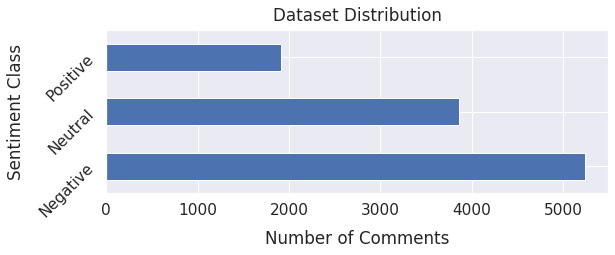

In [12]:

sns.set(font_scale=1.4)
data['Tag'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

Data Cleaning

In [13]:

# Data cleaning function
def process_comments(Comment): 
    Comment = re.sub('[^\u0980-\u09FF]',' ',str(Comment)) #removing unnecessary punctuation
    return Comment

In [14]:
# Apply the function into the dataframe
data['cleaned'] = data['Comments'].apply(process_comments)  

# print some cleaned reviews from the dataset
sample_data = [10,100,25,854,966,1500,1589,1700,2000,2500,4000,4500]
for i in sample_data:
     print('Original:\n',data.Comments[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment:-- ',data.Tag[i],'\n')

Original:
 চেয়ার কিনেছি অনলি ফর ইউ! 
Cleaned:
 চেয়ার কিনেছি অনলি ফর ইউ  
 Sentiment:--  Negative 

Original:
 সরকার জনগণের সাপোর্ট নিয়েই ক্ষমতায় এসেছে বিএনপিকে এখন জনগণ চায় না এটা ভাল মত বুজতে পারে বলেই এখন এসব করে আবার ক্ষমতায় আসার চেষ্টা চালাচ্ছে 
Cleaned:
 সরকার জনগণের সাপোর্ট নিয়েই ক্ষমতায় এসেছে বিএনপিকে এখন জনগণ চায় না এটা ভাল মত বুজতে পারে বলেই এখন এসব করে আবার ক্ষমতায় আসার চেষ্টা চালাচ্ছে 
 Sentiment:--  Neutral 

Original:
 নিচের ছবি গুলা সত্য আর হারানোর বেদনার!! আর উপরের টা মিথ্যা গল্পের 
Cleaned:
 নিচের ছবি গুলা সত্য আর হারানোর বেদনার   আর উপরের টা মিথ্যা গল্পের 
 Sentiment:--  Neutral 

Original:
 আপতত কয়েকদিন চুপ থাকেন 
Cleaned:
 আপতত কয়েকদিন চুপ থাকেন 
 Sentiment:--  Negative 

Original:
 মানুষের বিবেক যখন পঁচে যায় তখন আল্লাহ শাস্তি হিসেবে মানুষকে আওয়ামী লীগে পাঠিয়ে দেন। 
Cleaned:
 মানুষের বিবেক যখন পঁচে যায় তখন আল্লাহ শাস্তি হিসেবে মানুষকে আওয়ামী লীগে পাঠিয়ে দেন  
 Sentiment:--  Negative 

Original:
 অতঃপর আমি শেষের শব্দ বুঝতে না পেরে, ইহা কপি করে গুগল-এ গিয়ে বুঝার চেষ্টা

Remove Low lenght data

In [15]:
# Length of each Reveiws
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the reviews with least words
dataset = data.loc[data.length>1]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 133 Small Reviews 
Total Reviews: 10873


Dataset Summary

In [16]:
def data_summary(dataset):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Tag.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Tag==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.Tag==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Tag==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)


Class Name :  Negative
Number of Documents:5201
Number of Words:73396
Number of Unique Words:14563
Most Frequent Words:

না	1466
করে	757
আর	670
এই	603
কি	569
আপনার	421
নাস্তিক	376
তো	373
থেকে	364
জন্য	342

Class Name :  Neutral
Number of Documents:3803
Number of Words:50674
Number of Unique Words:11674
Most Frequent Words:

না	962
করে	482
কি	406
আর	404
এই	370
আপনার	286
ভাই	275
হবে	262
কিছু	257
জন্য	241

Class Name :  Positive
Number of Documents:1869
Number of Words:25927
Number of Unique Words:6997
Most Frequent Words:

না	382
করে	257
আপনার	255
জন্য	192
এই	178
অনেক	168
আপনি	166
ভাই	162
আর	158
ভালো	155
Total Number of Unique Words:22873


Dataset Summary Visualization

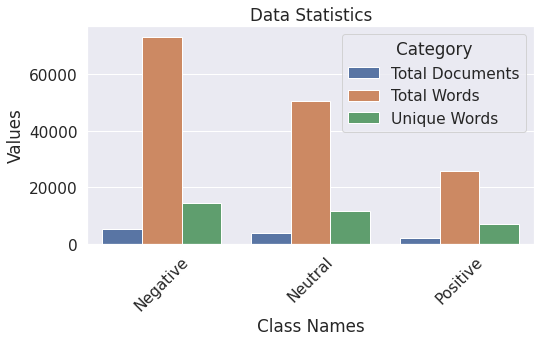

In [17]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(8, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

Comment Lenght Distribution

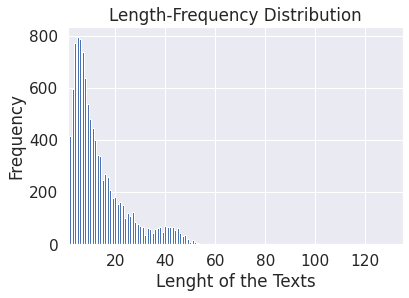

Maximum Length of a review: 153
Minimum Length of a review: 2
Average Length of a reviews: 14.0


In [18]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

Take only Positive and Negative Class for Model Building

In [19]:
positive = dataset[dataset.Tag == 'Positive']
negative = dataset[dataset.Tag == 'Negative']
#neutral = dataset[dataset.Tag == 'Neutral'][:1800]
dataset = positive.append(negative,ignore_index=True)
#dataset = dataset1.append(neutral,ignore_index=True)
dataset.Tag.value_counts()

Negative    5201
Positive    1869
Name: Tag, dtype: int64

**Lable Encoding and Dataset Splitting**

In [20]:
#==================================================
                                       ################# Label Encoding Function #########
                                       #==================================================

def label_encoding(sentiment,bool):
    """
    This function will return the encoded labels in array format. 
    
    Args:
        sentiment: series of class names(str)
        bool: boolean (True or False)
        
    Returns:
        labels: numpy array 
    """
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels



                           #===========================================================
                           ################# Dataset Splitting Function ###############
                           #=========================================================== 

def dataset_split(feature_space,sentiment):
    """
    This function will return the splitted (80%-20%) feature vector . 
    
    Args:
        feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array) 
        
    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test

In [21]:
dataset.cleaned = dataset.cleaned.apply(lambda x:x.replace('\n',' '))

Model Building Using Machine Learning
Feature Extraction Using TF-IDF 

In [22]:
#======================================
                                            ##### Unigram Tf-idf value calculation
                                            #======================================
            
def calc_gram_tfidf(reviews,gram):
    """
    This function will return the tf-idf value of the respective gram features . 
    
    Args:
        reviews: a list of cleaned reviews   
        
    Returns:
        tfidf: a instance of TfidfVectorizer
        X : Unigram Feature Vector (sparse matrix)
    """
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [24]:
#============================================
                                              #########  Classifiers Defination  #########
                                              #============================================
def ml_models_defination(): 
    """
    This function consists the models defination for All gram Features
    
    Retuns:
        ml_models: list of models
        model_names: list of model_names
    
    """
    
    lr_model = LogisticRegression(random_state = 123,solver='lbfgs',max_iter=5000)
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    mnb_model = MultinomialNB(alpha=0.15)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM']
    #model_names = ['Logistic Regression']
    # Create list of models
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    #ml_models = [lr_model]
    return ml_models,model_names 


                                          #============================================
                                           ####### Model Evaluation Function ############
                                           #=============================================

def model_performace(model,X_train,X_test,y_train,y_test):
    """
    This function will return the performance parameter values of each ML models.
    Performance parameters are Accuracy, F1-Score, Precision, Recall.
    
    Args:
        model: a ML model instance
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
        
    Returns:
        my_dict: a dictionary of all the parameters for each models
    """
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y,average='weighted'),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y,average='weighted'),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y,average='weighted'),4)*100 
    
    return my_dict  

                                        #========================================
                                        #### Model Performane into Dataframe #####
                                        #=========================================
            
def performance_table(performance_dict):
    """
    This function will create a dataframe of all the performance parameters.
    
    Args:
        performance_dict: a dictionary of all the parameters for each models
        
    Returns:
        performance_df: a dataframe
    """

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df


Model Training

In [25]:
## save the performance of the model for each gram feature 
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.cleaned,gram)
    labels = label_encoding(dataset.Tag,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = ml_models_defination()
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    #Save the performance parameter into json file
    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
           json.dump(accuracy, f)

Feature Size :======> 17731

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 7070 
	Training		 6363 
	Test			 707
Feature Size :======> 88113

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 7070 
	Training		 6363 
	Test			 707
Feature Size :======> 166861

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 7070 
	Training		 6363 
	Test			 707


Performance Table

In [26]:

# Load all the json files
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  print(f"\n========== Performace Table for {gram} feature:========\n",table)
  print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
  print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")


========== Performace Table for Unigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     80.20      81.44   80.20     76.22          LR
1     76.80      75.70   76.80     76.10          DT
2     78.93      78.28   78.93     75.18          RF
3     82.60      81.74   82.60     81.56         MNB
4     80.48      80.69   80.48     80.58         KNN
5     76.80      79.51   76.80     69.60  Linear SVM
6     78.36      80.39   78.36     72.78     RBF SVM

========In case of Unigram feature:========

Highest Accuracy achieved by MNB at = 82.6
Highest F1-Score achieved by MNB at = 81.56
Highest Precision Score achieved by MNB at = 81.74
Highest Recall Score achieved by MNB at = 82.6

========== Performace Table for Bigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     77.37      80.93   77.37     70.51          LR
1     79.07      77.77   79.07     78.01          DT
2     79.77      80.98   79.77     75.54          RF
3     81.33     

Performance Visualization

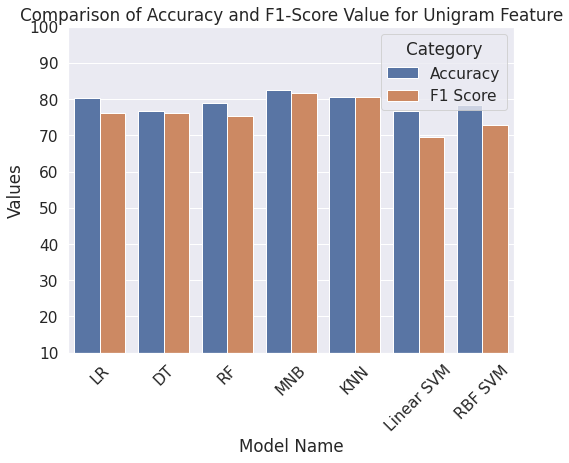

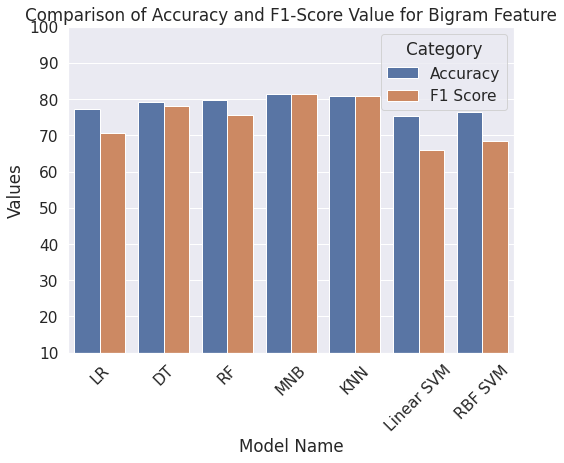

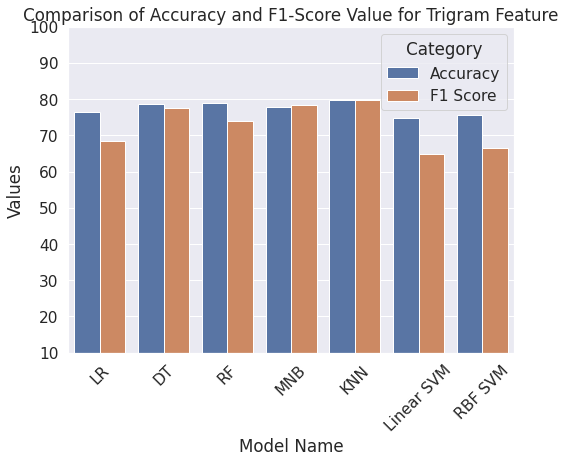

In [27]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  df = pd.melt(table[['Accuracy','F1 Score','Model Name']], id_vars="Model Name", var_name="Category", value_name="Values")
  plt.figure(figsize=(8,6))
  ax = plt.subplot()
  sns.barplot(data=df,x='Model Name', y='Values' ,hue='Category')
  ax.set_xlabel('Model Name') 
  ax.set_title(f'Comparison of Accuracy and F1-Score Value for {gram} Feature')
  ax.set_ylim([10,100])
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
mnb_model = MultinomialNB(alpha=0.15)

In [97]:
    tfidf,feature = calc_gram_tfidf(dataset.cleaned,(1,1))
    labels = label_encoding(dataset.Tag,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 

Feature Size :======> 17731

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 7070 
	Training		 6363 
	Test			 707


# **Since for UNIGRAM, MNB had the best result we apply 10 fold cross validation on MNB Model to summarize the cross-validation accuracy by calculating its mean.**

In [ ]:
    tfidf,feature = calc_gram_tfidf(dataset.cleaned,(1,1))
    labels = label_encoding(dataset.Tag,False)
    X1_train,X1_test,y1_train,y1_test = dataset_split(feature,labels) 

In [110]:
from sklearn import metrics

In [ ]:
mnb_model.fit(X_train,y_train)

In [ ]:
pred_y = mnb_model.predict(X_test)
pred_y

In [113]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(mnb_model, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.80533752 0.83359498 0.8288854  0.8254717  0.83018868 0.8663522
 0.81761006 0.82075472 0.81603774 0.82861635]


Score improves from  82.60 to 82.7285

In [114]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()*100))

Average cross-validation score: 82.7285


# **For BIGRAM, MNB had the best result. We apply cross val for MNB model.**

In [115]:
    tfidf,feature = calc_gram_tfidf(dataset.cleaned,(1,2))
    labels = label_encoding(dataset.Tag,False)
    X2_train,X2_test,y2_train,y2_test = dataset_split(feature,labels)

Feature Size :======> 88113

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 7070 
	Training		 6363 
	Test			 707


In [116]:
mnb_model.fit(X1_train,y1_train)

MultinomialNB(alpha=0.15, class_prior=None, fit_prior=True)

In [ ]:
pred_y = mnb_model.predict(X1_test)
pred_y

In [75]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(mnb_model, X1_train, y1_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.80690738 0.83359498 0.81318681 0.82232704 0.81761006 0.85691824
 0.8254717  0.82704403 0.80345912 0.8254717 ]


Score improves from 81.33 to 82.3199

In [118]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()*100))

Average cross-validation score: 82.7285


# **For TRIGRAM, KNN had the best result. We apply cross val for KNN model.**

In [119]:
knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')

In [ ]:
    tfidf,feature = calc_gram_tfidf(dataset.cleaned,(1,3))
    labels = label_encoding(dataset.Tag,False)
    X3_train,X3_test,y3_train,y3_test = dataset_split(feature,labels)

In [122]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
pred_y = knn_model.predict(X_test)
pred_y

In [124]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn_model, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.7755102  0.79905808 0.81946625 0.80503145 0.80188679 0.81918239
 0.8081761  0.79559748 0.7908805  0.80031447]


After applying score becomes 79.6007 from 79.63

In [125]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()*100))

Average cross-validation score: 80.1510


In [126]:
x=(accuracy_score(y_test, pred_y),4)
x

(0.8048090523338048, 4)

# **ROC**

MNB unigram

In [127]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

In [129]:
mnb_model1 = MultinomialNB(alpha=0.15)

In [131]:
mnb_model1.fit(X1_train,y1_train)

MultinomialNB(alpha=0.15, class_prior=None, fit_prior=True)

In [132]:
y_pred_prob_nb1 = mnb_model1.predict_proba(X1_test)[:,1]

In [133]:
fpr_nb1, tpr_nb1, thresholds_nb1 = roc_curve(y_test, y_pred_prob_nb)

MNB bigram

In [134]:
mnb_model2 = MultinomialNB(alpha=0.15)

In [135]:
mnb_model2.fit(X2_train,y2_train)

MultinomialNB(alpha=0.15, class_prior=None, fit_prior=True)

In [137]:
y_pred_prob_nb2 = mnb_model2.predict_proba(X2_test)[:,1]

In [138]:
fpr_nb2, tpr_nb2, thresholds_nb2 = roc_curve(y2_test, y_pred_prob_nb2)


KNN trigram

In [139]:
knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')

In [140]:
knn_model.fit(X3_train,y3_train)
y_pred_prob_KNN = knn_model.predict_proba(X3_test)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y3_test, y_pred_prob_KNN)

ROC

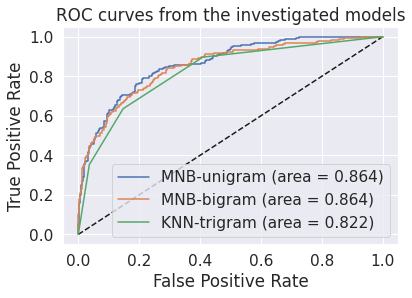

<Figure size 14400x7200 with 0 Axes>

In [152]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_nb1, tpr_nb1, label='MNB-unigram (area = %0.3f)' % roc_auc_nb)
plt.plot(fpr_nb2, tpr_nb2, label='MNB-bigram (area = %0.3f)' % roc_auc_nb)
plt.plot(fpr_KNN, tpr_KNN, label='KNN-trigram (area = %0.3f)' % roc_auc_KNN)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the models')
plt.legend(loc='best')

plt.show()
